# Caracterizando al cluster de clientes numero 2

Gracias a la tabla de Características Distintivas sabemos de este grupo que:

1. El articulo que compran son sueters en la categoria de ropa
2. Provienen los estados: Iowa, Kentucky, Vermont, Maine, Arizona, Illinois, Montana, North Carolina, Rhode Island, Indiana

Gracias a la tabla de Análisis Comparativo del Clúster 1 vs. Otros Clústeres sabemos de este grupo que:

1. Este grupo no presenta para la variable Age una mediana, media y dispersion significativamente mayor que otros clusters (grupos)

2. Para la variable Purchase Amount (USD) este grupo presenta una mediana y media significativamente mayor que los grupos 7 y 1 (0 para la columna Cluster) sin embargo para esta misma variable no existen grupos significativamente menos dispersos

3. Este grupo no presenta para la variable  Review Rating una mediana, media y dispersion significativamente mayor que otros clusters (grupos)

4. Para la variable Previous Purchases este grupo presenta mediana y media significativamente mayor que el grupo 4 sin embargo para esta misma variable no existen grupos menos dispersos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, kruskal, mannwhitneyu

df_customer = pd.read_csv("dataset/segmented_customers.csv")
# df_customer.head()

# Filtramos el DataFrame para el Clúster 2 (etiquetado como 1) 
df_cluster_2 = df_customer[df_customer['Cluster'] == 1].copy()

In [ ]:
#df_cluster_2["Location"].value_counts()

Location
Iowa              7
Illinois          7
Vermont           7
Montana           7
Kentucky          7
Maine             6
Idaho             5
Indiana           5
Louisiana         5
North Carolina    5
Arizona           5
South Carolina    4
Pennsylvania      4
California        4
Rhode Island      4
Texas             4
Arkansas          4
Nevada            4
Michigan          3
Colorado          3
New Jersey        3
New York          3
Nebraska          3
Missouri          3
Tennessee         3
Hawaii            3
Alaska            3
Ohio              3
Delaware          3
Florida           3
New Mexico        3
New Hampshire     2
Wisconsin         2
Alabama           2
Mississippi       2
Massachusetts     2
Oregon            2
Georgia           2
Virginia          2
Wyoming           2
Maryland          2
Oklahoma          1
West Virginia     1
Utah              1
Washington        1
Minnesota         1
South Dakota      1
Name: count, dtype: int64

#### Pregunta 1: ¿Influye el género en la compra de Sweater en el Clúster 2?

In [24]:
# Paso 1: Crear una tabla de contingencia para el análisis
# Filtramos los datos para incluir solo las compras de 'Sweater'
df_sweaters = df_cluster_2[df_cluster_2['Item Purchased'] == 'Sweater'].copy()
# Creamos la tabla de contingencia de género vs. Item Purchased (para este caso, solo 'Sweater').
# Esto nos dará la cuenta de hombres y mujeres que compraron un suéter.
contingency_table_sweater = pd.crosstab(df_sweaters['Gender'], df_sweaters['Item Purchased'])
print("### Tabla de Contingencia de Género vs. Sweater en el Clúster 2 ###\n")
print(contingency_table_sweater.to_markdown())

### Tabla de Contingencia de Género vs. Sweater en el Clúster 2 ###

| Gender   |   Sweater |
|:---------|----------:|
| Female   |        49 |
| Male     |       110 |


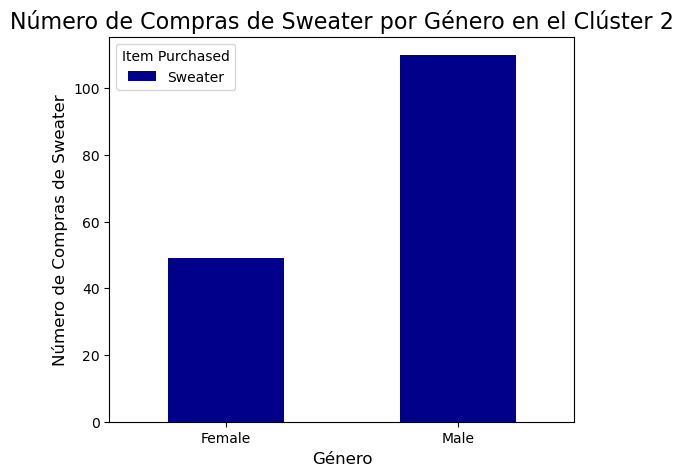

In [25]:
# Paso 2: Visualizar la relación con un gráfico de barras
# Un gráfico de barras simple es perfecto para esta comparación.
contingency_table_sweater.plot(kind='bar', figsize=(6, 5), color=['darkblue'])
plt.title('Número de Compras de Sweater por Género en el Clúster 2', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Compras de Sweater', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [26]:
# Paso 3: Realizar la prueba de Chi-cuadrado para la validación estadística
# Para la prueba, necesitamos una tabla de contingencia completa de género vs. todos los artículos
# o, si es el caso, una tabla de género vs. si compraron 'Sweater' o no.
# Crearemos una variable binaria para 'Sweater' para que la prueba sea correcta.
df_cluster_2['is_sweater'] = df_cluster_2['Item Purchased'] == 'Sweater'
contingency_table_full = pd.crosstab(df_cluster_2['Gender'], df_cluster_2['is_sweater'])
print("\n### Tabla de Contingencia de Género vs. Compra de Sweater ###\n")
print(contingency_table_full.to_markdown())

# Ahora, realizamos la prueba de Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table_full)

# Imprimimos los resultados
print("\n### Resultados de la Prueba de Chi-cuadrado para Género vs. Compra de Sweater ###")
print(f"**Estadística de Chi-cuadrado:** ${chi2:.4f}$")
print(f"**Valor p:** ${p_value:.4f}$")
print("\n---")



### Tabla de Contingencia de Género vs. Compra de Sweater ###

| Gender   |   True |
|:---------|-------:|
| Female   |     49 |
| Male     |    110 |

### Resultados de la Prueba de Chi-cuadrado para Género vs. Compra de Sweater ###
**Estadística de Chi-cuadrado:** $0.0000$
**Valor p:** $1.0000$

---


In [27]:
# Paso 4: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value < alpha:
    print(f"**El valor p de ${p_value:.4f}$ es menor que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una asociación estadísticamente significativa entre el género y la compra de Sweater en el Clúster 2.")
else:
    print(f"**El valor p de ${p_value:.4f}$ es mayor o igual que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una asociación estadísticamente significativa entre el género y la compra de Sweater en el Clúster 2.")



### Interpretación del Resultado ###
**El valor p de $1.0000$ es mayor o igual que el nivel de significancia de $0.05$.**
**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una asociación estadísticamente significativa entre el género y la compra de Sweater en el Clúster 2.


Conclusión del Análisis de Género y Compra de Sweater en el Clúster 2

El análisis de la tabla de contingencia y la prueba de Chi-cuadrado indican que no hay una asociación significativa entre el género del cliente y la compra de un suéter dentro del Clúster 2. El valor p de 1.0000 es mucho mayor que el nivel de significancia de 0.05, lo que nos lleva a no rechazar la hipótesis nula 

Esto sugiere que, a diferencia de otros grupos de clientes, el Sweater es un artículo que los clientes de este clúster compran independientemente de si son hombres o mujeres. Por lo tanto, el género no es una característica distintiva para segmentar a los compradores de suéteres dentro de este grupo.

#### Pregunta 2: ¿Influye la localización en la frecuencia de compra?

In [28]:
# Paso 1: Crear una tabla de contingencia para el análisis
contingency_table_location = pd.crosstab(df_cluster_2['Location'], df_cluster_2['Frequency of Purchases'])
print("### Tabla de Contingencia de Ubicación vs. Frecuencia de Compra en el Clúster 2 ###\n")
print(contingency_table_location.to_markdown())

### Tabla de Contingencia de Ubicación vs. Frecuencia de Compra en el Clúster 2 ###

| Location       |   Annually |   Bi-Weekly |   Every 3 Months |   Fortnightly |   Monthly |   Quarterly |   Weekly |
|:---------------|-----------:|------------:|-----------------:|--------------:|----------:|------------:|---------:|
| Alabama        |          0 |           0 |                0 |             1 |         0 |           0 |        1 |
| Alaska         |          1 |           2 |                0 |             0 |         0 |           0 |        0 |
| Arizona        |          0 |           1 |                1 |             1 |         1 |           0 |        1 |
| Arkansas       |          1 |           0 |                1 |             0 |         1 |           1 |        0 |
| California     |          2 |           1 |                0 |             0 |         0 |           0 |        1 |
| Colorado       |          0 |           2 |                0 |             0 |         

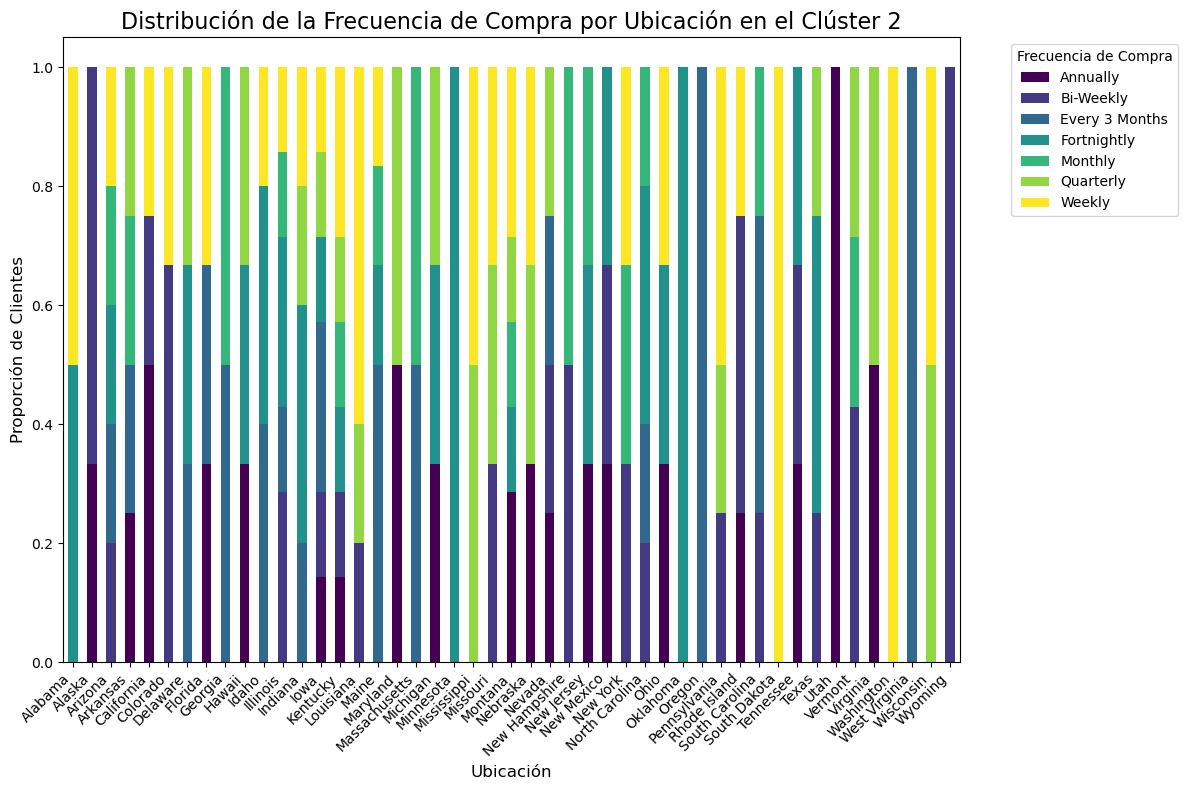

In [29]:
# Paso 2: Visualizar la relación con un gráfico de barras apiladas
# Normalizamos la tabla para mostrar proporciones y entender la distribución
contingency_table_normalized = contingency_table_location.div(contingency_table_location.sum(1).astype(float), axis=0)

contingency_table_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribución de la Frecuencia de Compra por Ubicación en el Clúster 2', fontsize=16)
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Proporción de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Frecuencia de Compra', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
# Paso 3: Realizar la prueba de Chi-cuadrado para la validación estadística
chi2, p_value, dof, expected = chi2_contingency(contingency_table_location)

# Imprimimos los resultados
print("\n### Resultados de la Prueba de Chi-cuadrado para Ubicación vs. Frecuencia de Compra ###")
print(f"**Estadística de Chi-cuadrado:** ${chi2:.4f}$")
print(f"**Valor p:** ${p_value:.4f}$")
print("\n---")


### Resultados de la Prueba de Chi-cuadrado para Ubicación vs. Frecuencia de Compra ###
**Estadística de Chi-cuadrado:** $251.1461$
**Valor p:** $0.8561$

---


In [31]:
# Paso 4: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value < alpha:
    print(f"**El valor p de ${p_value:.4f}$ es menor que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una asociación estadísticamente significativa entre la ubicación y la frecuencia de compra en el Clúster 2.")
else:
    print(f"**El valor p de ${p_value:.4f}$ es mayor o igual que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una asociación estadísticamente significativa entre la ubicación y la frecuencia de compra en el Clúster 2.")



### Interpretación del Resultado ###
**El valor p de $0.8561$ es mayor o igual que el nivel de significancia de $0.05$.**
**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una asociación estadísticamente significativa entre la ubicación y la frecuencia de compra en el Clúster 2.


Conclusión del Análisis de Ubicación y Frecuencia de Compra en el Clúster 2

El análisis estadístico revela que no existe una asociación significativa entre la ubicación del cliente y su frecuencia de compra dentro del Clúster 2. Con un valor p de 0.8561 que es considerablemente mayor que el nivel de significancia de 0.05, no hay evidencia suficiente para rechazar la hipótesis nula.

Esto implica que la frecuencia con la que los clientes de este clúster realizan sus compras no está influenciada por su localización geográfica, lo que sugiere que para este segmento, la estrategia de marketing no debería basarse en la ubicación.

#### Pregunta 3: ¿Influye el género en la frecuencia de compra?

In [32]:
# Paso 1: Crear una tabla de contingencia para el análisis
contingency_table_gender = pd.crosstab(df_cluster_2['Gender'], df_cluster_2['Frequency of Purchases'])
print("### Tabla de Contingencia de Género vs. Frecuencia de Compra en el Clúster 2 ###\n")
print(contingency_table_gender.to_markdown())

### Tabla de Contingencia de Género vs. Frecuencia de Compra en el Clúster 2 ###

| Gender   |   Annually |   Bi-Weekly |   Every 3 Months |   Fortnightly |   Monthly |   Quarterly |   Weekly |
|:---------|-----------:|------------:|-----------------:|--------------:|----------:|------------:|---------:|
| Female   |          5 |          13 |                7 |             4 |         4 |           8 |        8 |
| Male     |         16 |          15 |               15 |            21 |        11 |          12 |       20 |


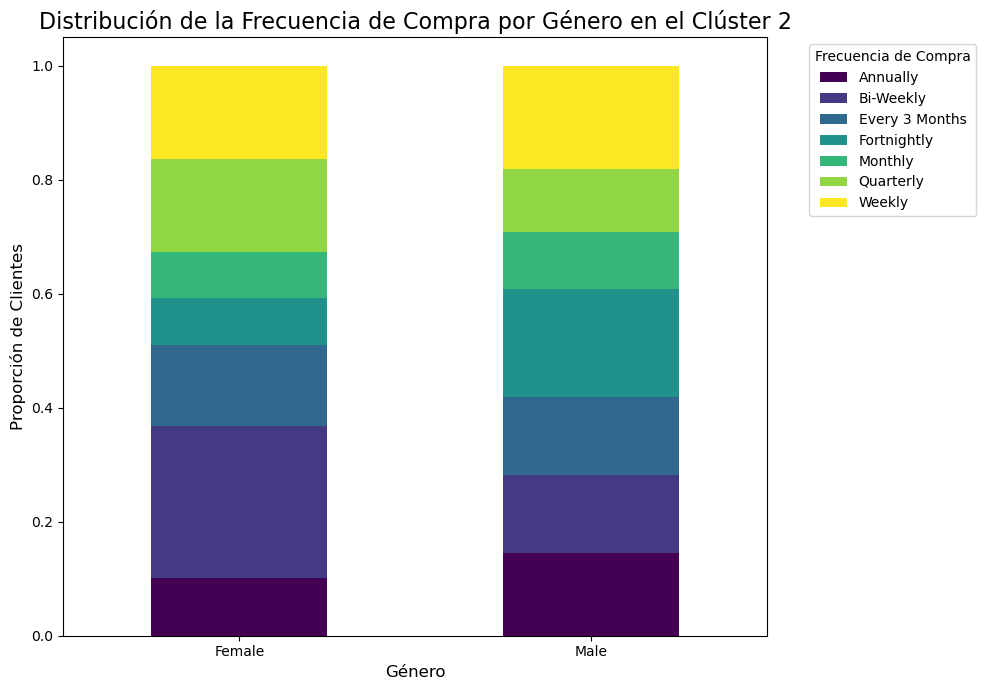

In [33]:
# Paso 2: Visualizar la relación con un gráfico de barras apiladas
# Normalizamos la tabla para mostrar proporciones
contingency_table_normalized = contingency_table_gender.div(contingency_table_gender.sum(1).astype(float), axis=0)

contingency_table_normalized.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Distribución de la Frecuencia de Compra por Género en el Clúster 2', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Proporción de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Frecuencia de Compra', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
# Paso 3: Realizar la prueba de Chi-cuadrado para la validación estadística
chi2, p_value, dof, expected = chi2_contingency(contingency_table_gender)

# Imprimimos los resultados
print("\n### Resultados de la Prueba de Chi-cuadrado para Género vs. Frecuencia de Compra ###")
print(f"**Estadística de Chi-cuadrado:** ${chi2:.4f}$")
print(f"**Valor p:** ${p_value:.4f}$")
print("\n---")

# Paso 4: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value < alpha:
    print(f"**El valor p de ${p_value:.4f}$ es menor que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una asociación estadísticamente significativa entre el género y la frecuencia de compra en el Clúster 2.")
else:
    print(f"**El valor p de ${p_value:.4f}$ es mayor o igual que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una asociación estadísticamente significativa entre el género y la frecuencia de compra en el Clúster 2.")



### Resultados de la Prueba de Chi-cuadrado para Género vs. Frecuencia de Compra ###
**Estadística de Chi-cuadrado:** $7.2476$
**Valor p:** $0.2986$

---

### Interpretación del Resultado ###
**El valor p de $0.2986$ es mayor o igual que el nivel de significancia de $0.05$.**
**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una asociación estadísticamente significativa entre el género y la frecuencia de compra en el Clúster 2.


Conclusión del Análisis de Género y Frecuencia de Compra en el Clúster 2

El análisis de la prueba de Chi-cuadrado para el Clúster 2 muestra que el género del cliente no influye en la frecuencia con la que realiza sus compras. Con un valor p de 0.2986 (mayor que el nivel de significancia de 0.05), no podemos rechazar la hipótesis nula.

Esto significa que, para los clientes de este clúster, la frecuencia de compra es independiente de si son hombres o mujeres. Por lo tanto, el género no debe ser una variable clave al diseñar estrategias de marketing dirigidas a este grupo.

#### Pregunta 4: ¿Influye la estación del año (Season) en la calificación de las reseñas (Review Rating)? 

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_11944\2566567127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Review Rating', data=df_cluster_2, palette='viridis')


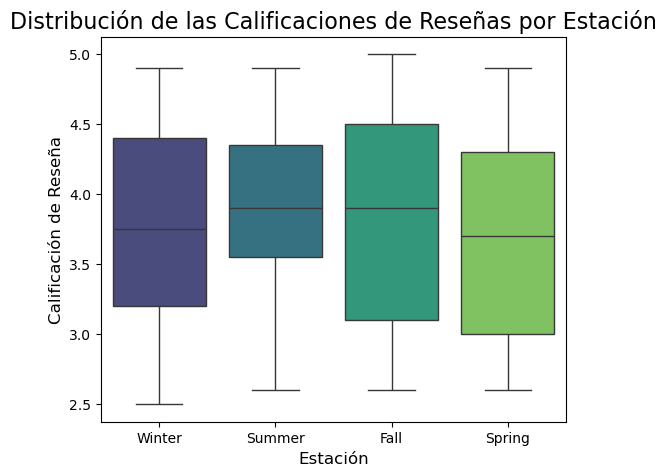

In [35]:
# Paso 1: Visualizar la distribución de los 'Review Rating' por estación con un box plot
plt.figure(figsize=(6, 5))
sns.boxplot(x='Season', y='Review Rating', data=df_cluster_2, palette='viridis')
plt.title('Distribución de las Calificaciones de Reseñas por Estación', fontsize=16)
plt.xlabel('Estación', fontsize=12)
plt.ylabel('Calificación de Reseña', fontsize=12)
plt.show()

In [36]:
# Paso 2: Preparar los datos para la prueba de Kruskal-Wallis
# Creamos una lista de las calificaciones para cada estación
spring_ratings = df_cluster_2[df_cluster_2['Season'] == 'Spring']['Review Rating']
summer_ratings = df_cluster_2[df_cluster_2['Season'] == 'Summer']['Review Rating']
fall_ratings = df_cluster_2[df_cluster_2['Season'] == 'Fall']['Review Rating']
winter_ratings = df_cluster_2[df_cluster_2['Season'] == 'Winter']['Review Rating']

# Paso 3: Realizar la prueba de Kruskal-Wallis
statistic, p_value = kruskal(spring_ratings, summer_ratings, fall_ratings, winter_ratings)

# Imprimimos los resultados
print("\n### Resultados de la Prueba de Kruskal-Wallis para Estación vs. Calificación de Reseñas ###")
print(f"**Estadística de H:** ${statistic:.4f}$")
print(f"**Valor p:** ${p_value:.4f}$")
print("\n---")

# Paso 4: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value < alpha:
    print(f"**El valor p de ${p_value:.4f}$ es menor que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una diferencia estadísticamente significativa en las medianas de las calificaciones de reseñas entre al menos dos de las estaciones.")
else:
    print(f"**El valor p de ${p_value:.4f}$ es mayor o igual que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una diferencia estadísticamente significativa en las medianas de las calificaciones de reseñas entre las estaciones.")



### Resultados de la Prueba de Kruskal-Wallis para Estación vs. Calificación de Reseñas ###
**Estadística de H:** $1.6161$
**Valor p:** $0.6558$

---

### Interpretación del Resultado ###
**El valor p de $0.6558$ es mayor o igual que el nivel de significancia de $0.05$.**
**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una diferencia estadísticamente significativa en las medianas de las calificaciones de reseñas entre las estaciones.


La conclusión es muy clara:

No hay evidencia estadística para afirmar que la estación del año tenga un impacto significativo en las calificaciones de las reseñas para los clientes de este clúster. Las diferencias que se observan en las calificaciones entre primavera, verano, otoño e invierno son probablemente aleatorias y no lo suficientemente grandes como para ser consideradas importantes.

#### Pregunta 5: ¿Existen diferencias en la calificación numérica de las reseñas ('Review Rating') por parte de distintos géneros ('Gender')?

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_11944\454647180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Review Rating', data=df_cluster_2, palette='coolwarm')


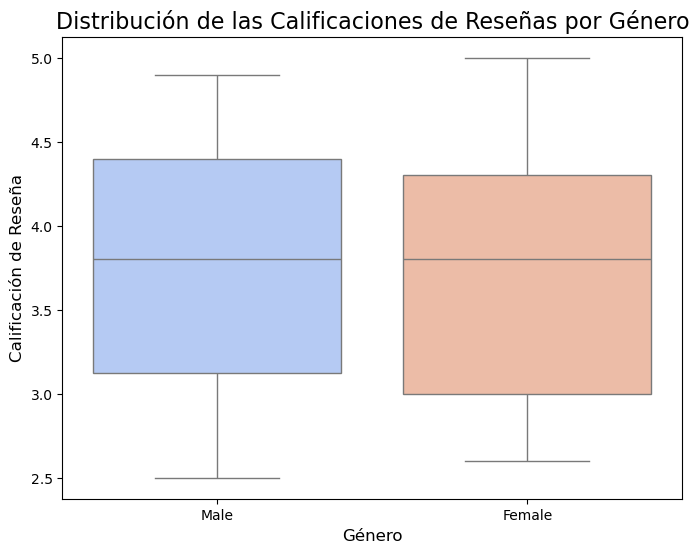

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Review Rating', data=df_cluster_2, palette='coolwarm')
plt.title('Distribución de las Calificaciones de Reseñas por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Calificación de Reseña', fontsize=12)
plt.show()


In [38]:
# Paso 2: Preparar los datos para la prueba de Mann-Whitney U
# Aseguramos que solo estamos comparando los dos grupos que nos interesan
ratings_male = df_cluster_2[df_cluster_2['Gender'] == 'Male']['Review Rating']
ratings_female = df_cluster_2[df_cluster_2['Gender'] == 'Female']['Review Rating']

# Paso 3: Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(ratings_male, ratings_female, alternative='two-sided')

# Imprimimos los resultados
print("\n### Resultados de la Prueba de Mann-Whitney U para Género vs. Calificación de Reseñas ###")
print(f"**Estadística U:** ${statistic:.4f}$")
print(f"**Valor p:** ${p_value:.4f}$")
print("\n---")

# Paso 4: Interpretar el resultado
alpha = 0.05
print("\n### Interpretación del Resultado ###")
if p_value < alpha:
    print(f"**El valor p de ${p_value:.4f}$ es menor que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** Rechazamos la hipótesis nula ($H_0$). Existe una diferencia estadísticamente significativa en las medianas de las calificaciones de reseñas entre hombres y mujeres.")
else:
    print(f"**El valor p de ${p_value:.4f}$ es mayor o igual que el nivel de significancia de ${alpha}$.**")
    print("**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una diferencia estadísticamente significativa en las medianas de las calificaciones de reseñas entre hombres y mujeres.")



### Resultados de la Prueba de Mann-Whitney U para Género vs. Calificación de Reseñas ###
**Estadística U:** $2760.5000$
**Valor p:** $0.8082$

---

### Interpretación del Resultado ###
**El valor p de $0.8082$ es mayor o igual que el nivel de significancia de $0.05$.**
**Conclusión:** No podemos rechazar la hipótesis nula ($H_0$). No existe una diferencia estadísticamente significativa en las medianas de las calificaciones de reseñas entre hombres y mujeres.


Conclusión: No existe una diferencia estadísticamente significativa en las medianas de las calificaciones de reseñas entre hombres y mujeres. Las diferencias observadas en los datos son probablemente el resultado de una variación aleatoria y no de un efecto real del género en la calificación de las reseñas.


#### Pregunta 6: ¿Existe alguna diferencia en la aplicación de descuentos entre hombres y mujeres?

In [39]:
# Paso 1: Crear una tabla de contingencia y normalizarla para ver proporciones
# Normalizamos por índice (por género) para que las barras sumen 100%
contingency_table = pd.crosstab(df_cluster_2['Gender'], df_cluster_2['Discount Applied'], normalize='index') * 100
contingency_table = contingency_table.round(2)

print("### Proporción de Descuentos por Género (%) ###")
print(contingency_table)
print("\n---")

### Proporción de Descuentos por Género (%) ###
Discount Applied     No   Yes
Gender                       
Female            100.0   0.0
Male               30.0  70.0

---


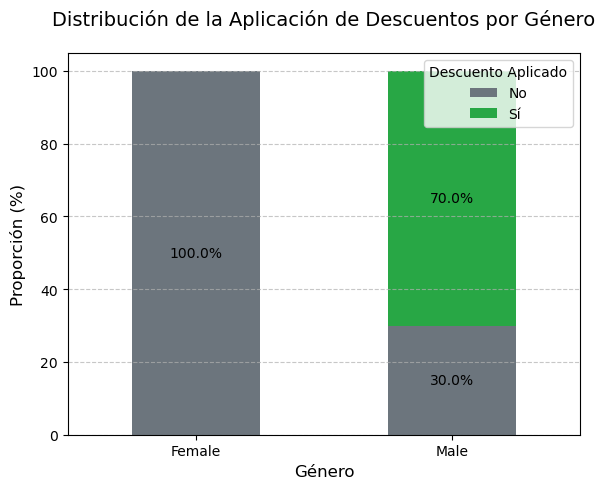

In [43]:
# Paso 2: Crear el gráfico de barras apiladas
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(6, 5), color=['#6c757d', '#28a745'])

# Agregar etiquetas de porcentaje en cada segmento de la barra
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

# Configuramos el gráfico para una mejor visualización
plt.title('Distribución de la Aplicación de Descuentos por Género', fontsize=14, pad=20)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Proporción (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Descuento Aplicado', labels=['No', 'Sí'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [42]:
# Realizar la prueba de Chi-Cuadrado
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(contingency_table)

# Imprimir los resultados sin símbolos especiales
print("\n### Resultados de la Prueba de Chi-Cuadrado ###")
print(f"Estadística de Chi-Cuadrado (chi2): {chi2_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad: {degrees_of_freedom}")
print("\n---")

# Interpretar el resultado
alpha = 0.05
print("\n### Conclusión Estadística ###")
if p_value < alpha:
    print(f"Dado que el valor p de {p_value:.4f} es menor que el nivel de significancia (alpha=0.05),")
    print("Rechazamos la hipótesis nula. Esto indica que existe una asociación estadísticamente significativa entre el género y la aplicación de descuentos.")
else:
    print(f"Dado que el valor p de {p_value:.4f} es mayor o igual que el nivel de significancia (alpha=0.05),")
    print("No podemos rechazar la hipótesis nula. Esto sugiere que no hay una asociación estadísticamente significativa entre el género y la aplicación de descuentos.")



### Resultados de la Prueba de Chi-Cuadrado ###
Estadística de Chi-Cuadrado (chi2): 104.6374
Valor p: 0.0000
Grados de libertad: 1

---

### Conclusión Estadística ###
Dado que el valor p de 0.0000 es menor que el nivel de significancia (alpha=0.05),
Rechazamos la hipótesis nula. Esto indica que existe una asociación estadísticamente significativa entre el género y la aplicación de descuentos.


A modo de conclusion, los resultados indican que la aplicación de descuentos está fuertemente correlacionada con el género, mostrando que los clientes hombres tienen una probabilidad considerablemente mayor de aplicar y utilizar un descuento en comparación con las clientes mujeres.